In [1]:
import datetime

In [2]:
# Meeting Sections

# Total Number of Sections
# Total Number of Section over time
# Stats on Each individual sections

# Total Number of Speaking roles over 5 meetings
# Total Number of Speaking Roles with alloted time
# Total Number of Speaking Roles over alloted time
# Total Number of Speaking Roles +30 seconds over alloted time
# Stats into individual meeting section speaker roles
## Agenda Timing




# Read in Data

In [3]:
meeting_chunks = pd.read_csv('~/meeting_chunks.csv')
meeting_chunks.shape

(40, 12)

In [4]:
speaker_data = pd.read_csv('~/speaker_data.csv')
speaker_data.shape

(118, 15)

# Clean Data

#### Save all time is minutes

In [5]:
# Making total allotted and actual minutes
meeting_chunks['actual_chunk_minutes'] = (meeting_chunks['Actual Hour']*60) + meeting_chunks['Actual Minutes'] + (meeting_chunks['Actual Seconds']/60)
meeting_chunks['chunk_minutes'] = (meeting_chunks['Allotted Hour']*60) + meeting_chunks['Allotted Minute'] + (meeting_chunks['Allotted Seconds']/60)

speaker_data['total_actual_speaker_minutes'] = (speaker_data['Actual Hour']*60) + speaker_data['Actual Minute'] + (speaker_data['Actual Seconds']/60)
speaker_data['allotted_speaker_minutes'] = (speaker_data['Allotted Hour']*60) + speaker_data['Allotted Minute'] + (speaker_data['Alloted Seconds']/60)

#### Convert to datetime

In [6]:
speaker_data['Start Time'] = pd.to_datetime(speaker_data['Start Time'])
speaker_data['End Time'] = pd.to_datetime(speaker_data['End Time'])


#### merge datasets

In [7]:
meeting_chunks_v2 = meeting_chunks[['Meeting No.', 'Meeting Date', 'Chunk', 'Comments', 'actual_chunk_minutes', 'chunk_minutes']]
meeting_chunks_v2 = meeting_chunks_v2.rename(columns={'Chunk':'Meeting Chuck'})
speaker_data_v2 = speaker_data.merge(meeting_chunks_v2, on=['Meeting No.', 'Meeting Date', 'Meeting Chuck'], how='left')

#### clean column names

In [8]:
speaker_data_v2.columns = speaker_data_v2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
speaker_data_v2 = speaker_data_v2.rename(columns={'meeting_chuck': 'meeting_chunk'})

In [9]:
speaker_data_v2.head(2)

,meeting_no,meeting_date,start_time,end_time,meeting_chunk,role_name,allotted_hour,allotted_minute,alloted_seconds,alloted_time,actual_hour,actual_minute,actual_seconds,actual_time,no_guests,total_actual_speaker_minutes,allotted_speaker_minutes,comments,actual_chunk_minutes,chunk_minutes
0,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,Introduce Guest and Theme,TME Theme Introduction,0,0,0,0:00:00,0,3,48,0:03:48,NaN,3.800000,0.0,NaN,9.3,5.0
1,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,Introduce Guest and Theme,Guest Introductions,0,0,0,0:00:00,0,4,19,0:04:19,6.0,4.316667,0.0,NaN,9.3,5.0


In [10]:
speaker_data_v2.head(3)

,meeting_no,meeting_date,start_time,end_time,meeting_chunk,role_name,allotted_hour,allotted_minute,alloted_seconds,alloted_time,actual_hour,actual_minute,actual_seconds,actual_time,no_guests,total_actual_speaker_minutes,allotted_speaker_minutes,comments,actual_chunk_minutes,chunk_minutes
0,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,Introduce Guest and Theme,TME Theme Introduction,0,0,0,0:00:00,0,3,48,0:03:48,NaN,3.800000,0.0,NaN,9.300000,5.0
1,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,Introduce Guest and Theme,Guest Introductions,0,0,0,0:00:00,0,4,19,0:04:19,6.0,4.316667,0.0,NaN,9.300000,5.0
2,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,Evaluation Introduction,Ah Counter Role,0,0,0,0:00:00,0,0,51,0:00:51,NaN,0.850000,0.0,NaN,5.766667,5.0


#### Clean text data

In [11]:
speaker_data_v3 = speaker_data_v2.replace({'meeting_chunk' : { 'Introduce Guest and Theme' : '1. Introduce Guest and Theme', 
                                            'Evaluation Introduction' : '2. Evaluation Introduction', 
                                            'Speech Program' : '3. Speech Program',
                                            'Table Topics': '4. Table Topics', 
                                            'Evaluation': '5. Evaluation',
                                           'Club Business': '6. Club Business',
                                           'Comments/Annoucements': '7. Comments/Annoucements'}
                        }
                       )

speaker_data_v3 = speaker_data_v3.replace({'role_name': {'Speaker 1': 'Speaker',
                                      'Speaker 2' : 'Speaker',
                                      'Speaker 3' : 'Speaker',
                                      'TT - 1': 'TT Speaker',
                                       'TT - 2': 'TT Speaker',
                                       'TT - 3': 'TT Speaker',
                                       'TT - 4': 'TT Speaker',
                                       'TT - 5': 'TT Speaker',
                                       'TT - 6': 'TT Speaker',
                                       'TT - 7': 'TT Speaker',
                                       'TT - 8': 'TT Speaker',
                                       'TT - 9': 'TT Speaker',
                                       'TT - 10': 'TT Speaker',
                                       'TT - 11': 'TT Speaker',
                                       'Speech Evaluator 1': 'Speech Evaluator',
                                        'Speech Evaluator 2': 'Speech Evaluator',
                                        'Speech Evaluator 3': 'Speech Evaluator',}})

# Meeting Level Analysis
- duration of each meeting
- num started early and num ended late

#### Duration of each meeting

In [12]:
speaker_data_v3['meeting_duration'] = speaker_data_v3['end_time'] - speaker_data_v3['start_time']
meeting_duration =speaker_data_v3[['meeting_no', 'start_time', 'end_time', 'meeting_duration']].drop_duplicates()
meeting_duration

,meeting_no,start_time,end_time,meeting_duration
0,575,2020-01-03 18:08:00,2020-01-03 19:52:00,01:44:00
23,576,2020-01-03 18:11:00,2020-01-03 20:03:00,01:52:00
45,577,2020-01-03 18:06:00,2020-01-03 19:47:00,01:41:00
68,578,2020-01-03 18:11:00,2020-01-03 19:49:00,01:38:00
91,579,2020-01-03 18:12:00,2020-01-03 19:57:00,01:45:00


In [13]:
print('The minimum meeting duration is:', meeting_duration['meeting_duration'].min())
print('The average meeting duration is:', meeting_duration['meeting_duration'].mean())
print('The maximum meeting duration is:', meeting_duration['meeting_duration'].max())

('The minimum meeting duration is:', Timedelta('0 days 01:38:00'))
('The average meeting duration is:', Timedelta('0 days 01:44:00'))
('The maximum meeting duration is:', Timedelta('0 days 01:52:00'))


#### Number of meetings started and ended early/late

Number of meetings started early/late

In [14]:
meeting_duration['started_on_time'] = meeting_duration['start_time'].apply(lambda x: 'On time' if x.time() <= datetime.time(18,10) else 'Late')
meeting_duration['started_on_time_within_5'] = meeting_duration['start_time'].apply(lambda x: 'On time' if x.time() <= datetime.time(18,15) else 'Late')

In [15]:
meeting_duration.groupby('started_on_time').meeting_no.count().reset_index().rename(columns={'meeting_no':'count'}).plot.bar(x='started_on_time', y='count')

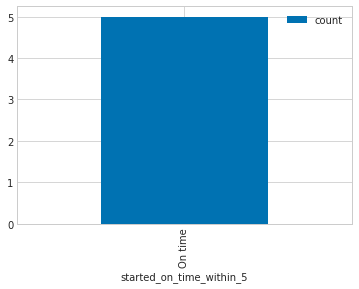

In [16]:
meeting_duration.groupby('started_on_time_within_5').meeting_no.count().reset_index().rename(columns={'meeting_no':'count'}).plot.bar(x='started_on_time_within_5', y='count')

Number of meetings ending late

In [17]:
meeting_duration['ended_on_time'] = meeting_duration['end_time'].apply(lambda x: 'On time' if x.time() <= datetime.time(19,55) else 'Late')
meeting_duration['ended_on_time_within_5'] = meeting_duration['end_time'].apply(lambda x: 'On time' if x.time() <= datetime.time(20,0) else 'Late')

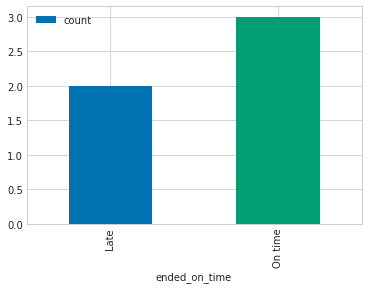

In [18]:
meeting_duration.groupby('ended_on_time').meeting_no.count().reset_index().rename(columns={'meeting_no':'count'}).plot.bar(x='ended_on_time', y='count')

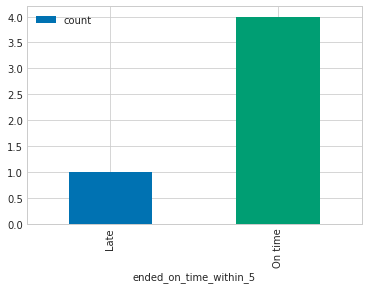

In [19]:
meeting_duration.groupby('ended_on_time_within_5').meeting_no.count().reset_index().rename(columns={'meeting_no':'count'}).plot.bar(x='ended_on_time_within_5', y='count')

In [20]:
meeting_duration

,meeting_no,start_time,end_time,meeting_duration,started_on_time,started_on_time_within_5,ended_on_time,ended_on_time_within_5
0,575,2020-01-03 18:08:00,2020-01-03 19:52:00,01:44:00,On time,On time,On time,On time
23,576,2020-01-03 18:11:00,2020-01-03 20:03:00,01:52:00,Late,On time,Late,Late
45,577,2020-01-03 18:06:00,2020-01-03 19:47:00,01:41:00,On time,On time,On time,On time
68,578,2020-01-03 18:11:00,2020-01-03 19:49:00,01:38:00,Late,On time,On time,On time
91,579,2020-01-03 18:12:00,2020-01-03 19:57:00,01:45:00,Late,On time,Late,On time


# Specific Agenda Groupings
There are x grouping for our agenda. They are:
- Introduce Guest and Theme
- Evaluation Introduction
    - General Evaluator intro
    - Ah Counter intro
    - Grammarian intro
    - Timer intro
- Speech Program
    - All speakers
- Table Topics
- Break
- Evaluation
    - All speech evaluations
    - Ah Counter report
    - Grammarian report
    - Timer report
- Club Business
- Comments/Annoucements
    - Guest comments
    - Ajourn

Individual roles such as the "sign-up sheet distribution" and "timer" were not timed.

In [21]:
meeting_sections = speaker_data_v3[['meeting_no', 'meeting_date', 'meeting_chunk', 'actual_chunk_minutes', 'chunk_minutes']].drop_duplicates()
meeting_sections.shape

(35, 5)

In [22]:
avg_section_time = (speaker_data_v3
                        .groupby(['meeting_chunk'])
                        .agg({'chunk_minutes': 'mean', 'actual_chunk_minutes':'mean'})
                        .reset_index()
                        .rename(columns={'chunk_minutes': 'allotted_section_time',
                                         'actual_chunk_minutes': 'avg_section_time'}))

avg_section_time['percent_of_alloted_time'] = avg_section_time['avg_section_time']/avg_section_time['allotted_section_time']
avg_section_time = avg_section_time.sort_values(by='percent_of_alloted_time', ascending = False)
avg_section_time

,meeting_chunk,allotted_section_time,avg_section_time,percent_of_alloted_time
4,5. Evaluation,15.0,20.526667,1.368444
0,1. Introduce Guest and Theme,5.0,6.590000,1.318000
1,2. Evaluation Introduction,5.0,5.310000,1.062000
2,3. Speech Program,30.0,31.236667,1.041222
3,4. Table Topics,20.0,17.537597,0.876880
5,6. Club Business,10.0,3.646667,0.364667
6,7. Comments/Annoucements,10.0,3.463333,0.346333


In [23]:
avg_break_time = meeting_chunks_v2[meeting_chunks_v2['Meeting Chuck']=='Break'].actual_chunk_minutes.mean()
print('The avg break time is :', avg_break_time)
print('max:', meeting_chunks_v2[meeting_chunks_v2['Meeting Chuck']=='Break'].actual_chunk_minutes.max())
print('min:', meeting_chunks_v2[meeting_chunks_v2['Meeting Chuck']=='Break'].actual_chunk_minutes.min())

('The avg break time is :', 6.8199999999999985)
('max:', 7.666666666666667)
('min:', 6.166666666666667)


## Total Number of Roles

In [24]:
total_num_speaker_roles = speaker_data_v3.shape[0]
print('Total number of speaker roles over the 5 meetings:', total_num_speaker_roles)

('Total number of speaker roles over the 5 meetings:', 118)


In [25]:
num_timed_roles = total_num_speaker_roles - speaker_data_v3[speaker_data_v3['allotted_speaker_minutes']==0].shape[0]
print('Total number of timed speaker roles over the 5 meetings:', num_timed_roles)

('Total number of timed speaker roles over the 5 meetings:', 83)


In [26]:
speaker_data_v3['speaker_over_time'] = np.where((speaker_data_v3['allotted_speaker_minutes']!=0) & 
                                               (speaker_data_v3['total_actual_speaker_minutes']>speaker_data_v3['allotted_speaker_minutes']), 1, 0)
num_timed_roles_overtime = speaker_data_v3[speaker_data_v3['speaker_over_time']==1].shape[0]
print('This is the number of timed roles that are over the alloted time:', num_timed_roles_overtime)
print('percent roles over time:', num_timed_roles_overtime/(num_timed_roles*1.0))

('This is the number of timed roles that are over the alloted time:', 23)
('percent roles over time:', 0.27710843373493976)


In [27]:
speaker_data_v3['speaker_30_over_time'] = np.where((speaker_data_v3['allotted_speaker_minutes']!=0) & 
                                               (speaker_data_v3['total_actual_speaker_minutes']>(speaker_data_v3['allotted_speaker_minutes']+0.5)), 1, 0)
num_timed_roles_30_overtime = speaker_data_v3[speaker_data_v3['speaker_30_over_time']==1].shape[0]
print('This is the number of timed roles that are 30 seconds over the alloted time:', num_timed_roles_30_overtime)
print('percent roles > 30 seconds over time:', num_timed_roles_30_overtime/(num_timed_roles*1.0))

('This is the number of timed roles that are 30 seconds over the alloted time:', 15)
('percent roles > 30 seconds over time:', 0.18072289156626506)


In [28]:
speaker_data_v3.head()

,meeting_no,meeting_date,start_time,end_time,meeting_chunk,role_name,allotted_hour,allotted_minute,alloted_seconds,alloted_time,...,actual_time,no_guests,total_actual_speaker_minutes,allotted_speaker_minutes,comments,actual_chunk_minutes,chunk_minutes,meeting_duration,speaker_over_time,speaker_30_over_time
0,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,1. Introduce Guest and Theme,TME Theme Introduction,0,0,0,0:00:00,...,0:03:48,NaN,3.800000,0.0,NaN,9.300000,5.0,01:44:00,0,0
1,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,1. Introduce Guest and Theme,Guest Introductions,0,0,0,0:00:00,...,0:04:19,6.0,4.316667,0.0,NaN,9.300000,5.0,01:44:00,0,0
2,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,2. Evaluation Introduction,Ah Counter Role,0,0,0,0:00:00,...,0:00:51,NaN,0.850000,0.0,NaN,5.766667,5.0,01:44:00,0,0
3,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,2. Evaluation Introduction,Grammarian Role,0,0,0,0:00:00,...,0:03:12,NaN,3.200000,0.0,NaN,5.766667,5.0,01:44:00,0,0
4,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,3. Speech Program,Speaker,0,4,0,0:04:00,...,0:03:23,NaN,3.383333,4.0,NaN,28.450000,30.0,01:44:00,0,0


In [32]:
speaker_data_v3[speaker_data_v3['meeting_chunk']== '3. Speech Program'].shape

(15, 23)

In [30]:
over_alloted_time_df = (speaker_data_v3
                        .groupby('meeting_chunk')
                        .agg({'role_name': 'count', 'speaker_30_over_time':'sum', 'speaker_over_time':'sum'})
                        .reset_index())
over_alloted_time_df = over_alloted_time_df[over_alloted_time_df['speaker_over_time']>0]
over_alloted_time_df

,meeting_chunk,speaker_30_over_time,role_name,speaker_over_time
2,3. Speech Program,9,15,10
3,4. Table Topics,0,43,2
4,5. Evaluation,6,30,11


### Evaluation Section
- On average this section has 7 speakers: 3 speech evaluators, grammarian, timer, ah counter and general evaluator
- Assume each speech evaluator and the general evaluator speaks for 3 minutes. Assume timer, ah counter and grammarian speak for 1 minute each. This adds up to 15 minutes. There is no room for error here
- No space for 30 second overage period

In [33]:
speaker_data_v3.head()

,meeting_no,meeting_date,start_time,end_time,meeting_chunk,role_name,allotted_hour,allotted_minute,alloted_seconds,alloted_time,...,actual_time,no_guests,total_actual_speaker_minutes,allotted_speaker_minutes,comments,actual_chunk_minutes,chunk_minutes,meeting_duration,speaker_over_time,speaker_30_over_time
0,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,1. Introduce Guest and Theme,TME Theme Introduction,0,0,0,0:00:00,...,0:03:48,NaN,3.800000,0.0,NaN,9.300000,5.0,01:44:00,0,0
1,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,1. Introduce Guest and Theme,Guest Introductions,0,0,0,0:00:00,...,0:04:19,6.0,4.316667,0.0,NaN,9.300000,5.0,01:44:00,0,0
2,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,2. Evaluation Introduction,Ah Counter Role,0,0,0,0:00:00,...,0:00:51,NaN,0.850000,0.0,NaN,5.766667,5.0,01:44:00,0,0
3,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,2. Evaluation Introduction,Grammarian Role,0,0,0,0:00:00,...,0:03:12,NaN,3.200000,0.0,NaN,5.766667,5.0,01:44:00,0,0
4,575,11/6/2019,2020-01-03 18:08:00,2020-01-03 19:52:00,3. Speech Program,Speaker,0,4,0,0:04:00,...,0:03:23,NaN,3.383333,4.0,NaN,28.450000,30.0,01:44:00,0,0


In [37]:
speaker_data_v3[(speaker_data_v3['meeting_chunk']=='5. Evaluation')].groupby('role_name').agg({'total_actual_speaker_minutes':'mean', 'speaker_over_time':'sum','meeting_no':'count'}).reset_index()

,role_name,meeting_no,speaker_over_time,total_actual_speaker_minutes
0,Ah Counter Report,5,0,0.840000
1,General Evaluator Report,5,0,3.446667
2,Grammarian Report,5,0,2.156667
3,Speech Evaluator,15,11,3.341111


#### General Evaluator

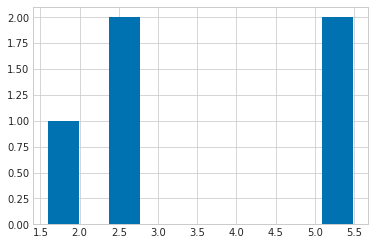

In [37]:
speaker_data_v3[(speaker_data_v3['meeting_chunk']=='5. Evaluation') & 
                (speaker_data_v3['role_name']=='General Evaluator Report')]['total_actual_speaker_minutes'].hist()

#### Speech Evaluators

In [38]:
speech_evaluator_data = speaker_data_v3[(speaker_data_v3['meeting_chunk']=='5. Evaluation') & 
                (speaker_data_v3['role_name']=='Speech Evaluator')]

In [41]:
print(speech_evaluator_data.speaker_over_time.sum())
print((speech_evaluator_data.speaker_over_time.sum())/(speech_evaluator_data.shape[0]*1.0))
print("This is the number and percent of speech evaluators over time")

11
0.7333333333333333
This is the number and percent of speech evaluators over time


In [42]:
print(speech_evaluator_data.speaker_30_over_time.sum())
print((speech_evaluator_data.speaker_30_over_time.sum())/(speech_evaluator_data.shape[0]*1.0))
print("This is the number and percent of speech evaluators over 3 minutes and 30 seconds")

6
0.4
This is the number and percent of speech evaluators over 3 minutes and 30 seconds


### 1. Introduce Guest and Theme
- only 5 minutes are allotted to this whole section. Generally it should be 5 minutes to introduce the theme and some time to introduce the guest

In [43]:
(speaker_data_v3[(speaker_data_v3['meeting_chunk']=='1. Introduce Guest and Theme')]
     .groupby(['meeting_chunk', 'role_name'])
     .agg({'total_actual_speaker_minutes':['mean', 'median']}).reset_index())

meeting_chunk               role_name  \
                                                          
0  1. Introduce Guest and Theme     Guest Introductions   
1  1. Introduce Guest and Theme  TME Theme Introduction   

  total_actual_speaker_minutes         
                          mean median  
0                     2.493333    2.0  
1                     3.980000    3.8

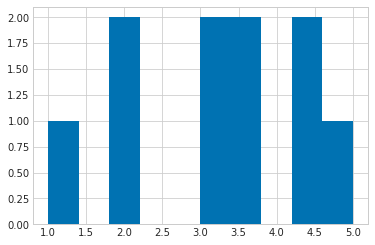

In [44]:
speaker_data_v3[(speaker_data_v3['meeting_chunk']=='1. Introduce Guest and Theme')]['total_actual_speaker_minutes'].hist()

### 2. Evaluation Introduction	

- Grammarian has more to introduce than the ah counter
    - Description of their role
    - WOD with examples
    - Knock on table when you hear the WOD

In [40]:
(speaker_data_v3[(speaker_data_v3['meeting_chunk']=='2. Evaluation Introduction')]
     .groupby(['meeting_chunk', 'role_name'])
     .agg({'total_actual_speaker_minutes':'mean'}).reset_index())

,meeting_chunk,role_name,total_actual_speaker_minutes
0,2. Evaluation Introduction,Ah Counter Role,0.82
1,2. Evaluation Introduction,Grammarian Role,2.09


### 3. Speech Program
- There is a decent amount of leaway time here

In [47]:
(speaker_data_v3[(speaker_data_v3['meeting_chunk']=='3. Speech Program')]
     .groupby(['meeting_chunk', 'role_name'])
     .agg({'total_actual_speaker_minutes':['mean', 'median']}).reset_index())

meeting_chunk role_name total_actual_speaker_minutes          
                                                       mean    median
0  3. Speech Program   Speaker                     7.108889  7.333333

In [48]:
main_speeches = speaker_data_v3[(speaker_data_v3['meeting_chunk']=='3. Speech Program')]
main_speeches.shape

(15, 23)

In [60]:
main_speeches.head(1)

,meeting_no,meeting_date,start_time,end_time,meeting_chunk,role_name,allotted_hour,allotted_minute,alloted_seconds,alloted_time,...,actual_time,no_guests,total_actual_speaker_minutes,allotted_speaker_minutes,comments,actual_chunk_minutes,chunk_minutes,meeting_duration,speaker_over_time,speaker_30_over_time
4,575,11/6/2019,2020-01-02 18:08:00,2020-01-02 19:52:00,3. Speech Program,Speaker,0,4,0,0:04:00,...,0:03:23,NaN,3.383333,4.0,NaN,28.45,30.0,01:44:00,0,0


In [81]:
main_speeches_groupby = (main_speeches
                             .groupby(['role_name', 'allotted_speaker_minutes'])
                             .agg({'actual_chunk_minutes': 'count', 
                                   'total_actual_speaker_minutes':['mean', 'min', 'max'], 
                                   'speaker_over_time': 'sum', 
                                   'speaker_30_over_time': 'sum'})
                             .reset_index()
                             .rename(columns={'actual_chunk_minutes': 'count_speeches'})
                        )

main_speeches_groupby.columns = ['_'.join(x) for x in main_speeches_groupby.columns]

main_speeches_groupby

,role_name_,allotted_speaker_minutes_,speaker_30_over_time_sum,speaker_over_time_sum,count_speeches_count,total_actual_speaker_minutes_mean,total_actual_speaker_minutes_min,total_actual_speaker_minutes_max
0,Speaker,4.0,0,0,1,3.383333,3.383333,3.383333
1,Speaker,6.0,2,3,4,6.145833,4.000000,7.333333
2,Speaker,7.0,6,6,9,7.648148,5.916667,9.333333
3,Speaker,8.0,1,1,1,9.833333,9.833333,9.833333


In [82]:
print(main_speeches.speaker_over_time.sum())
print((main_speeches.speaker_over_time.sum())/(main_speeches.shape[0]*1.0))
print("This is the number and percent of speakers over time")

10
0.6666666666666666
This is the number and percent of speakers over time


In [83]:
print(main_speeches.speaker_30_over_time.sum())
print((main_speeches.speaker_30_over_time.sum())/(main_speeches.shape[0]*1.0))
print("This is the number and percent of speakers over time past 30 seconds")

9
0.6
This is the number and percent of speakers over time past 30 seconds


In [135]:
print(main_speeches[main_speeches['allotted_speaker_minutes']==7].groupby('role_name').total_actual_speaker_minutes.mean())

print(main_speeches[main_speeches['allotted_speaker_minutes']==4].groupby('role_name').total_actual_speaker_minutes.mean())

role_name
Speaker    7.648148
Name: total_actual_speaker_minutes, dtype: float64
role_name
Speaker    3.383333
Name: total_actual_speaker_minutes, dtype: float64


Table topics may not be going over time however, I have noticed that the break started later than usual due to timer saying one more when there is 1-2 mins on the clock. This results in the rest of the meeting being delay as the TTM has to annouce to vote and recap the names. So if there is 2 mins left, then maybe wrap up table topics